In [433]:
import cv2
import os
import numpy as np
import sys
import matplotlib.pyplot as plt

In [434]:
subjects = ["", "Leo","Sandra"]

In [435]:
def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('C:/Users/phanc/Anaconda3/pkgs/libopencv-3.4.1-h875b8b8_3/Library/etc/lbpcascades/lbpcascade_frontalface.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
    if (len(faces) == 0):
        return None, None
    (x, y, w, h) = faces[0]
    return gray[y:y+w, x:x+h], faces[0]

In [436]:
def prepare_training_data(data_folder_path):
    #------STEP-1--------
    dirs = os.listdir(data_folder_path)
    faces = []
    labels = []
    for dir_name in dirs:
        if not dir_name.startswith("s"):
            continue;
        label = int(dir_name.replace("s", ""))
        subject_dir_path = data_folder_path + "/" + dir_name
        subject_images_names = os.listdir(subject_dir_path)
        for image_name in subject_images_names:
            if image_name.startswith("."):
                continue;
            image_path = subject_dir_path + "/" + image_name
            image = cv2.imread(image_path)
            face, rect = detect_face(image)
            if face is not None:
                faces.append(face)
                labels.append(label)
            cv2.destroyAllWindows()
            cv2.waitKey(1)
            cv2.destroyAllWindows()

    return faces, labels


In [437]:
print("Preparing data...")
faces, labels = prepare_training_data('C:/Hieu 2018/Data science/Projects/Face detection/data/train data')
print("Data prepared")

print("Total faces: ", len(faces))
print("Total labels: ", len(labels))
print(labels)


Preparing data...
Data prepared
Total faces:  26
Total labels:  26
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [438]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.train(faces, np.array(labels))

In [439]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)
    return
 
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), 5)
    return


In [455]:
def predict(test_img):
    img = test_img.copy()
    face, rect = detect_face(img)
    label= face_recognizer.predict(face)
#     print(label)
    label_text = subjects[label[0]]
    label_pro = str(int(100-max(label[1],0)))+'%'
    draw_rectangle(img, rect)
    if 100-max(label[1],0)>15:
        draw_text(img, label_text, rect[0], rect[1]-5)
    else:
        draw_text(img, "Unknown", rect[0], rect[1]-5)
    return img 

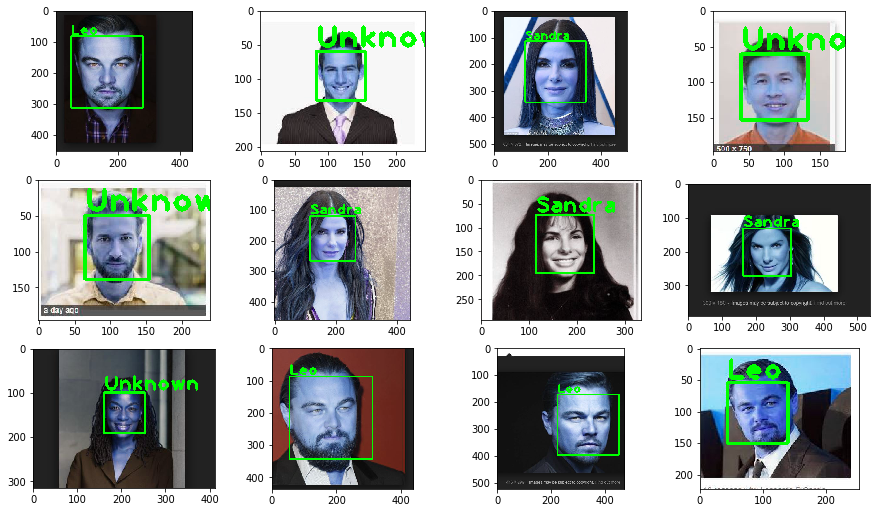

In [456]:
test_path="C:/Hieu 2018/Data science/Projects/Face detection/data/test data/"
pic_list=os.listdir(test_path)
fig=plt.figure(figsize=(15, 15))
for i in range(0,len(pic_list)):
    img=cv2.imread(test_path+pic_list[i])
    predicted_img = predict(img)
    fig.add_subplot(5, 4, i+1)
    plt.imshow(predicted_img)
plt.show()